In [1]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Use the dataframe and create a sqlite db

connection = sqlite3.connect('../2023_SqliteDV.db')

query = "SELECT * FROM plays"

df = pd.read_sql_query(query, connection)

In [3]:
connection.close()

In [4]:
play_types = df.groupby(by="Play Type")

In [5]:
play_types.size()

Play Type
Blocked Punt                    1
End Period                     17
End of Game                     8
End of Half                     6
End of Regulation               2
Field Goal Good                11
Field Goal Missed               7
Fumble Recovery (Opponent)     10
Fumble Recovery (Own)          12
Fumble Return Touchdown         1
Interception                   14
Kickoff                        37
Kickoff Return (Offense)       11
Pass Incompletion             122
Pass Interception Return        2
Pass Reception                146
Passing Touchdown              11
Penalty                        49
Punt                           64
Rush                          426
Rushing Touchdown              16
Sack                           30
Timeout                        59
dtype: int64

In [6]:
## Start some analysis

# Question 1: What were the distribution of yards catch for Thomas Fidone

# List of play types to include in rushing dataframe
passing_types = ["Pass Reception", "Passing Touchdown"]

# Filter the DataFrame to include only Rush play types
pass_df = df[df['Play Type'].isin(passing_types)]

In [7]:
print(len(pass_df))

157


In [8]:
# pass_df.head()

In [9]:
# Filter the DataFrame to include only rows with 'Thomas Fidone' in the play text column
lloyd_df = pass_df[pass_df['Play Text'].str.contains('Jaylen Lloyd')]

In [10]:
pass_total_yards = lloyd_df['Yards Gained'].sum()

In [11]:
print(pass_total_yards)

237


In [12]:
# johnson_df.head()

In [13]:
lloyd_df_sorted = lloyd_df.sort_values(by='Wallclock')
lloyd_df_sorted_reset = lloyd_df_sorted.reset_index(drop=True)

In [14]:
# Calculating the average 'Yards Gained' for Thomas
average_yards = lloyd_df_sorted_reset['Yards Gained'].mean()
std_dev_yards = lloyd_df_sorted_reset['Yards Gained'].std()

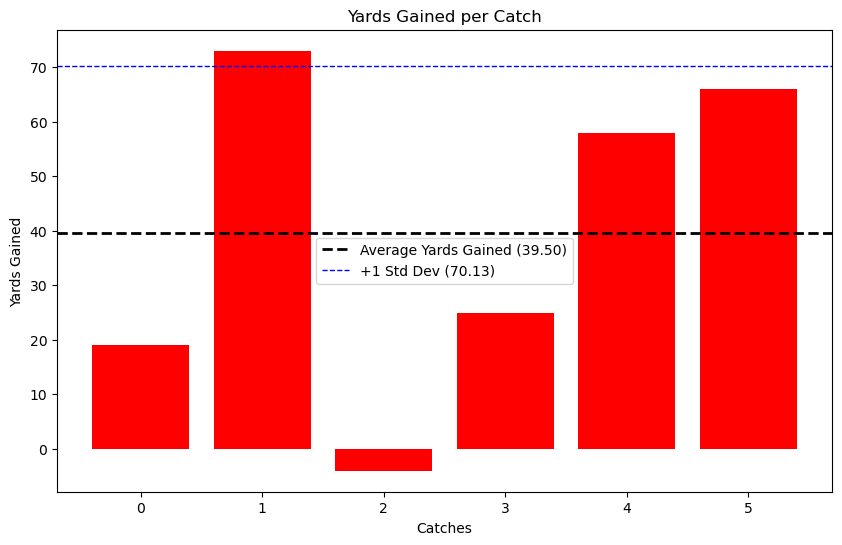

In [15]:
# Creating a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(lloyd_df_sorted_reset.index, lloyd_df_sorted_reset['Yards Gained'], color='red')

# Adding a horizontal line for the average
plt.axhline(average_yards, color='black', linestyle='--', linewidth=2, label=f'Average Yards Gained ({average_yards:.2f})')

# Adding horizontal lines for the standard deviation
plt.axhline(average_yards + std_dev_yards, color='blue', linestyle='--', linewidth=1, label=f'+1 Std Dev ({average_yards + std_dev_yards:.2f})')

plt.title('Yards Gained per Catch')
plt.xlabel('Catches')
plt.ylabel('Yards Gained')
plt.legend()
plt.show()